In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('train_bm.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
temp = pd.DataFrame(index =df.columns)
temp['null'] = df.isnull().sum()
temp['data-type'] = df.dtypes

In [5]:
temp

,null,data-type
Item_Identifier,0,object
Item_Weight,1463,float64
Item_Fat_Content,0,object
Item_Visibility,0,float64
Item_Type,0,object
Item_MRP,0,float64
Outlet_Identifier,0,object
Outlet_Establishment_Year,0,int64
Outlet_Size,2410,object
Outlet_Location_Type,0,object


In [6]:
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [7]:
df.drop(['Item_Identifier'], axis=1,inplace=True)

In [8]:
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(), inplace=True)

In [9]:
df['Item_Weight'].isnull().sum()

0

In [10]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [11]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)
df['Outlet_Size'].isnull().sum()

0

In [12]:
temp = pd.DataFrame(index =df.columns)
temp['null'] = df.isnull().sum()
temp['data-type'] = df.dtypes

In [13]:
temp

,null,data-type
Item_Weight,0,float64
Item_Fat_Content,0,object
Item_Visibility,0,float64
Item_Type,0,object
Item_MRP,0,float64
Outlet_Identifier,0,object
Outlet_Establishment_Year,0,int64
Outlet_Size,0,object
Outlet_Location_Type,0,object
Outlet_Type,0,object


In [14]:
df = pd.get_dummies(df)

In [15]:
df.shape

(8523, 46)

In [16]:
df.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [17]:
df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_S

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
x_scaled = scaler.fit_transform(x)

In [19]:
x = pd.DataFrame(x_scaled, columns=x.columns)


In [20]:
x.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
from sklearn.model_selection import train_test_split as ttt
train_x, test_x, train_y, test_y = ttt(x, y, random_state=96)

In [22]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [23]:
from sklearn.model_selection import cross_val_score

#

In [24]:
def Scores(N_negh):
    mean = []
    std = []
    for i in N_negh:
        temp = cross_val_score(KNN(n_neighbors=i), X = train_x, y =train_y, cv=10 )
        mean.append(temp.mean())
        std.append(temp.std())
    
    
    return mean, std

In [25]:
k = range(1,20)

In [26]:
mean, std = Scores(k)

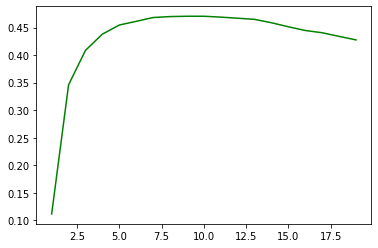

In [27]:
plt.plot(k,mean, color ='green', label='mean')
plt.show()

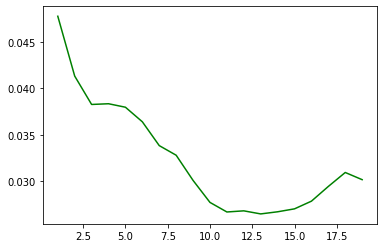

In [28]:
plt.plot(k,std, color ='green')

I will take k = 11 as it has good mean and less standard deviation

In [31]:
reg = KNN(n_neighbors =11)
reg.fit(train_x, train_y)
temp = reg.predict(test_x)
score = mse(temp, test_y)
score

1445401.872512826